### Importação das bibliotecas

In [64]:
import pandas as pd
import chardet
from tqdm import tqdm
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# file_path = 'MICRODADOS_ENEM_2019.csv'
# chunk_size = 1024 * 1024  # 1MB por vez

# # Detectando encoding com progresso
# with open(file_path, 'rb') as f:
#     total_size = f.seek(0, 2)  # Vai para o final do arquivo para pegar o tamanho total
#     f.seek(0)  # Volta para o início
#     detector = chardet.universaldetector.UniversalDetector()

#     for chunk in tqdm(iter(lambda: f.read(chunk_size), b''), total=total_size//chunk_size, unit='MB'):
#         detector.feed(chunk)
#         if detector.done:
#             break

#     detector.close()
#     encoding_detected = detector.result['encoding']

# print(f'Encoding detectado: {encoding_detected}')


  2%|█▋                                                                            | 64/3050 [02:17<1:34:54,  1.91s/MB]

### Leitura do dataset

In [7]:
df = pd.read_csv("MICRODADOS_ENEM_2019.csv",encoding='latin-1',sep=";")
#df = pd.read_csv('MICRODADOS_ENEM_2019.csv')  # Substitua pelo nome real do seu arquivo

In [9]:
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001595656,2019,3552205,Sorocaba,35,SP,36.0,M,1,3,...,A,A,A,A,A,A,C,A,C,B
1,190001421546,2019,2910800,Feira de Santana,29,BA,23.0,M,1,1,...,A,A,A,B,A,A,E,A,A,B
2,190001133210,2019,2304400,Fortaleza,23,CE,39.0,F,1,3,...,A,A,A,B,A,A,C,A,A,B
3,190001199383,2019,1721000,Palmas,17,TO,25.0,F,1,1,...,A,A,A,C,A,B,D,A,B,B
4,190001237802,2019,3118601,Contagem,31,MG,22.0,F,1,1,...,B,A,A,B,A,A,C,B,B,B


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095270 entries, 0 to 5095269
Columns: 136 entries, NU_INSCRICAO to Q025
dtypes: float64(25), int64(70), object(41)
memory usage: 5.2+ GB


### Filtrar alunos que moram em Fortaleza

In [10]:
df_fortaleza = df[df['NO_MUNICIPIO_RESIDENCIA'] == 'Fortaleza']
df_fortaleza.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
2,190001133210,2019,2304400,Fortaleza,23,CE,39.0,F,1,3,...,A,A,A,B,A,A,C,A,A,B
13,190001133211,2019,2304400,Fortaleza,23,CE,21.0,F,1,1,...,A,A,A,B,A,A,C,A,A,A
68,190001133212,2019,2304400,Fortaleza,23,CE,48.0,M,2,3,...,A,A,A,B,A,A,B,A,A,A
81,190001133214,2019,2304400,Fortaleza,23,CE,23.0,M,1,3,...,B,A,A,B,B,A,C,A,A,A
133,190001925229,2019,2304400,Fortaleza,23,CE,18.0,M,1,3,...,A,A,A,B,A,A,D,A,A,B


In [16]:
df_fortaleza.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93959 entries, 2 to 5095129
Columns: 136 entries, NU_INSCRICAO to Q025
dtypes: float64(25), int64(70), object(41)
memory usage: 98.2+ MB


### Excluir os alunos treineiros

In [22]:
df_exclusao_treineiro = df_fortaleza[df_fortaleza['IN_TREINEIRO'] != 1]
df_exclusao_treineiro.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
2,190001133210,2019,2304400,Fortaleza,23,CE,39.0,F,1,3,...,A,A,A,B,A,A,C,A,A,B
13,190001133211,2019,2304400,Fortaleza,23,CE,21.0,F,1,1,...,A,A,A,B,A,A,C,A,A,A
68,190001133212,2019,2304400,Fortaleza,23,CE,48.0,M,2,3,...,A,A,A,B,A,A,B,A,A,A
81,190001133214,2019,2304400,Fortaleza,23,CE,23.0,M,1,3,...,B,A,A,B,B,A,C,A,A,A
133,190001925229,2019,2304400,Fortaleza,23,CE,18.0,M,1,3,...,A,A,A,B,A,A,D,A,A,B


In [23]:
df_exclusao_treineiro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82982 entries, 2 to 5095129
Columns: 136 entries, NU_INSCRICAO to Q025
dtypes: float64(25), int64(70), object(41)
memory usage: 86.7+ MB


In [24]:
print(df_fortaleza['IN_TREINEIRO'].value_counts())

IN_TREINEIRO
0    82982
1    10977
Name: count, dtype: int64


### Excluir linhas com pelo menos um valor nulo

In [25]:
df_valores_nulos = df_exclusao_treineiro.dropna()
df_valores_nulos.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
133,190001925229,2019,2304400,Fortaleza,23,CE,18.0,M,1,3,...,A,A,A,B,A,A,D,A,A,B
786,190001128632,2019,2304400,Fortaleza,23,CE,17.0,M,1,3,...,A,A,A,B,A,A,C,A,B,B
946,190001128649,2019,2304400,Fortaleza,23,CE,17.0,F,1,2,...,B,A,A,B,A,B,D,A,B,B
1038,190001128655,2019,2304400,Fortaleza,23,CE,17.0,F,1,3,...,A,A,A,B,A,A,B,A,A,A
1212,190001128666,2019,2304400,Fortaleza,23,CE,18.0,F,1,3,...,A,A,A,B,B,A,A,A,A,B


In [51]:
df_valores_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21703 entries, 133 to 5068681
Columns: 136 entries, NU_INSCRICAO to Q025
dtypes: float64(25), int64(67), object(44)
memory usage: 22.7+ MB


### Colunas de variáveis qualitativas:
#### - TP_ESTADO_CIVIL (Estado civil do indivíduo)
#### - TP_COR_RACA (Raça do indivíduo)
#### - TP_NACIONALIDADE (Nacionalidade do indivíduo)


### Colunas de variáveis quantitativas:
#### - NU_NOTA_MT (Nota de matemática do indivíduo)
#### - NU_NOTA_CN (Nota de Ciências da Natureza do indivíduo)
#### - NU_NOTA_REDACAO (Nota de Redação do indivíduo)

In [42]:
estado_civil_map = {
    0: 'Não informado',
    1: 'Solteiro(a)',
    2: 'Casado(a)/Mora com companheiro(a)',
    3: 'Divorciado(a)/Desquitado(a)/Separado(a)',
    4: 'Viúvo(a)'
}

df_valores_nulos.loc[:, 'TP_ESTADO_CIVIL'] = df_valores_nulos['TP_ESTADO_CIVIL'].replace(estado_civil_map)

df_valores_nulos['TP_ESTADO_CIVIL'].head()

133     Solteiro(a)
786     Solteiro(a)
946     Solteiro(a)
1038    Solteiro(a)
1212    Solteiro(a)
Name: TP_ESTADO_CIVIL, dtype: object

In [43]:
df_valores_nulos['TP_ESTADO_CIVIL'].value_counts()

TP_ESTADO_CIVIL
Solteiro(a)                                20866
Não informado                                544
Casado(a)/Mora com companheiro(a)            173
Divorciado(a)/Desquitado(a)/Separado(a)      110
Viúvo(a)                                      10
Name: count, dtype: int64

In [45]:
raca_map = {
    0: 'Não declarado',
    1: 'Branca',
    2: 'Preta',
    3: 'Parda',
    4: 'Amarela',
    5: 'Indígena'
}

df_valores_nulos.loc[:, 'TP_COR_RACA'] = df_valores_nulos['TP_COR_RACA'].replace(raca_map)

df_valores_nulos['TP_COR_RACA'].head()

133     Parda
786     Parda
946     Preta
1038    Parda
1212    Parda
Name: TP_COR_RACA, dtype: object

In [46]:
df_valores_nulos['TP_COR_RACA'].value_counts()

TP_COR_RACA
Parda            13575
Branca            4833
Preta             2156
Não declarado      583
Amarela            424
Indígena           132
Name: count, dtype: int64

In [49]:
nacionalidade_map = {
    0: 'Não informado',
    1: 'Brasileiro(a)',
    2: 'Brasileiro(a) Naturalizado(a)',
    3: 'Estrangeiro(a)',
    4: 'Brasileiro(a) Nato(a), nascido(a) no exterior'
}

df_valores_nulos.loc[:, 'TP_NACIONALIDADE'] = df_valores_nulos['TP_NACIONALIDADE'].replace(nacionalidade_map)

df_valores_nulos['TP_NACIONALIDADE'].head()

133     Brasileiro(a)
786     Brasileiro(a)
946     Brasileiro(a)
1038    Brasileiro(a)
1212    Brasileiro(a)
Name: TP_NACIONALIDADE, dtype: object

In [48]:
df_valores_nulos['TP_NACIONALIDADE'].value_counts()

TP_NACIONALIDADE
Brasileiro(a)    21703
Name: count, dtype: int64

In [52]:
cols = df_valores_nulos[['TP_ESTADO_CIVIL','TP_COR_RACA','TP_NACIONALIDADE']]
cols.head()

,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE
133,Solteiro(a),Parda,Brasileiro(a)
786,Solteiro(a),Parda,Brasileiro(a)
946,Solteiro(a),Preta,Brasileiro(a)
1038,Solteiro(a),Parda,Brasileiro(a)
1212,Solteiro(a),Parda,Brasileiro(a)


Frequência de TP_ESTADO_CIVIL:
TP_ESTADO_CIVIL
1    4398485
2     395855
0     206800
3      87894
4       6236
Name: count, dtype: int64


Frequência de TP_COR_RACA:
TP_COR_RACA
3    2364063
1    1831779
2     648309
4     116162
0     103201
5      31756
Name: count, dtype: int64


Frequência de TP_NACIONALIDADE:
TP_NACIONALIDADE
1    4950021
2     124332
4       8233
0       6749
3       5935
Name: count, dtype: int64




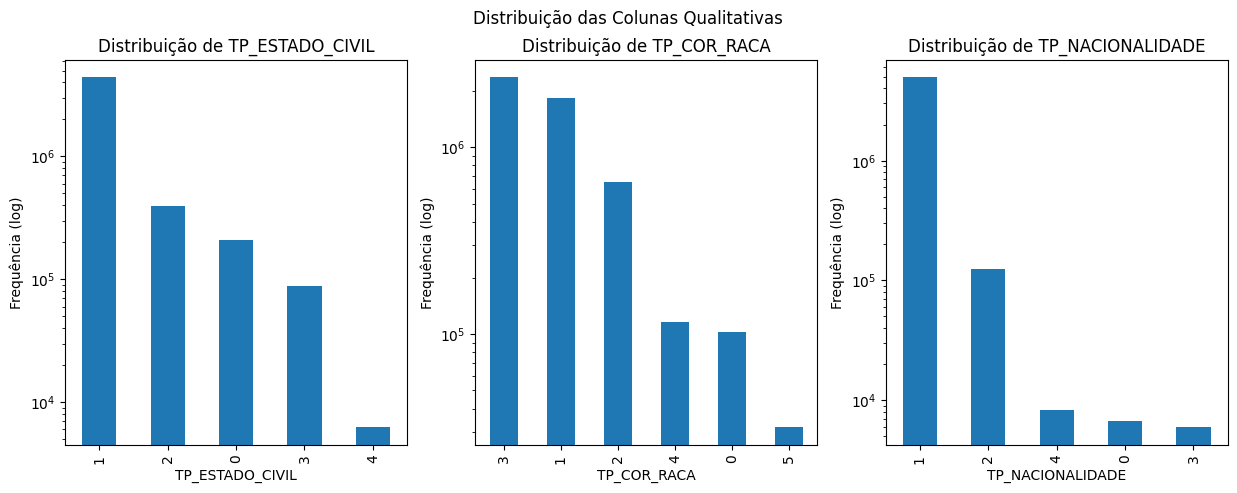

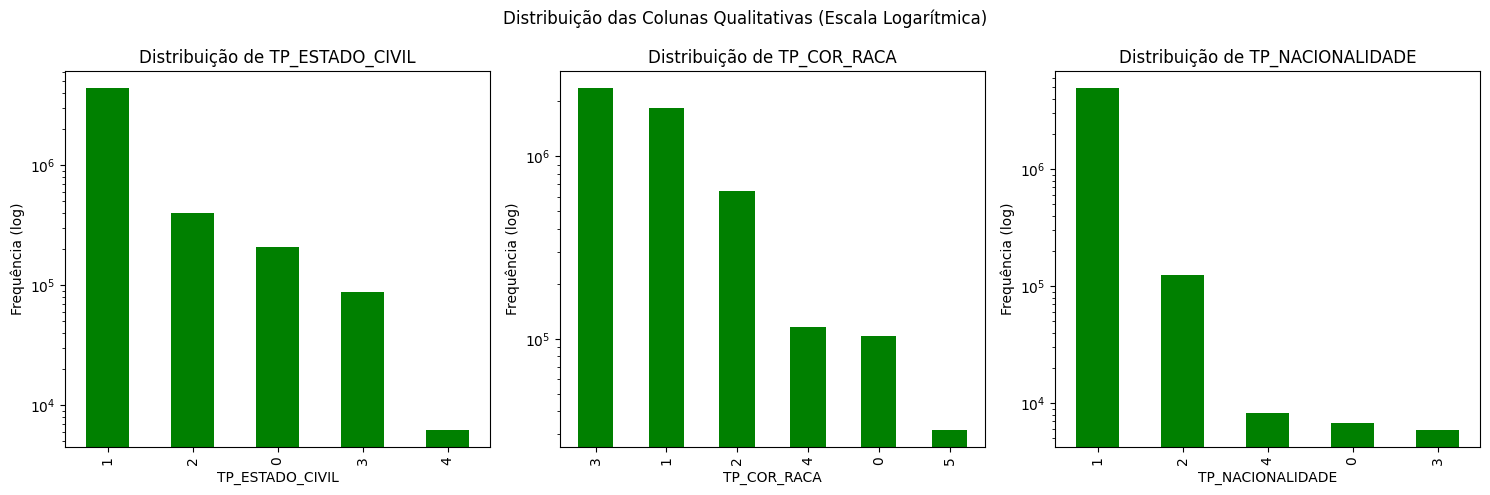

In [72]:
# Frequência das categorias para colunas qualitativas
for col in ['TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE']:
    print(f"Frequência de {col}:")
    print(df[col].value_counts())
    print("\n")

# Gráficos de barras para colunas qualitativas
plt.figure(figsize=(15, 5))
for i, col in enumerate(['TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE'], 1):
    plt.subplot(1, 3, i)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência (log)')
    plt.yscale('log')
plt.suptitle('Distribuição das Colunas Qualitativas')
plt.show()

plt.figure(figsize=(15, 5))
for i, col in enumerate(['TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE'], 1):
    plt.subplot(1, 3, i)
    df[col].value_counts().plot(kind='bar', color='green')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência (log)')
    plt.yscale('log')
plt.suptitle('Distribuição das Colunas Qualitativas (Escala Logarítmica)')
plt.tight_layout()
plt.show()

In [60]:
# Criando a tabela de contingência entre as variáveis qualitativas
tabela_contingencia = pd.crosstab(df_valores_nulos['TP_ESTADO_CIVIL'], 
                                  [df_valores_nulos['TP_COR_RACA'], df_valores_nulos['TP_NACIONALIDADE']])

# Exibindo a tabela de contingência
print("Tabela de Contingência:")
print(tabela_contingencia)

# Aplicando o teste Qui-quadrado
chi2, p_valor, dof, expected = chi2_contingency(tabela_contingencia)

# Exibindo os resultados do teste Qui-quadrado
print("\nResultado do Teste Qui-Quadrado:")
print(f"Estatística Qui-quadrado: {chi2}")
print(f"Valor p: {p_valor}")
# print(f"Graus de liberdade: {dof}")
# print(f"Tabela esperada:\n{expected}")

# Interpretação do p-valor
if p_valor < 0.05:
    print("\nHá uma associação significativa entre as variáveis (p < 0.05).")
else:
    print("\nNão há uma associação significativa entre as variáveis (p >= 0.05).")


Tabela de Contingência:
TP_COR_RACA                                   Amarela        Branca  \
TP_NACIONALIDADE                        Brasileiro(a) Brasileiro(a)   
TP_ESTADO_CIVIL                                                       
Casado(a)/Mora com companheiro(a)                   2            28   
Divorciado(a)/Desquitado(a)/Separado(a)             1            17   
Não informado                                      18           132   
Solteiro(a)                                       403          4655   
Viúvo(a)                                            0             1   

TP_COR_RACA                                  Indígena Não declarado  \
TP_NACIONALIDADE                        Brasileiro(a) Brasileiro(a)   
TP_ESTADO_CIVIL                                                       
Casado(a)/Mora com companheiro(a)                   2             8   
Divorciado(a)/Desquitado(a)/Separado(a)             3             1   
Não informado                                       

         NU_NOTA_MT    NU_NOTA_CN  NU_NOTA_REDACAO
count  3.710433e+06  3.710433e+06     3.923144e+06
mean   5.231241e+02  4.778241e+02     5.711883e+02
std    1.090637e+02  7.609774e+01     1.887633e+02
min    0.000000e+00  0.000000e+00     0.000000e+00
25%    4.351000e+02  4.178000e+02     4.800000e+02
50%    5.011000e+02  4.703000e+02     5.800000e+02
75%    5.978000e+02  5.332000e+02     6.800000e+02
max    9.855000e+02  8.609000e+02     1.000000e+03


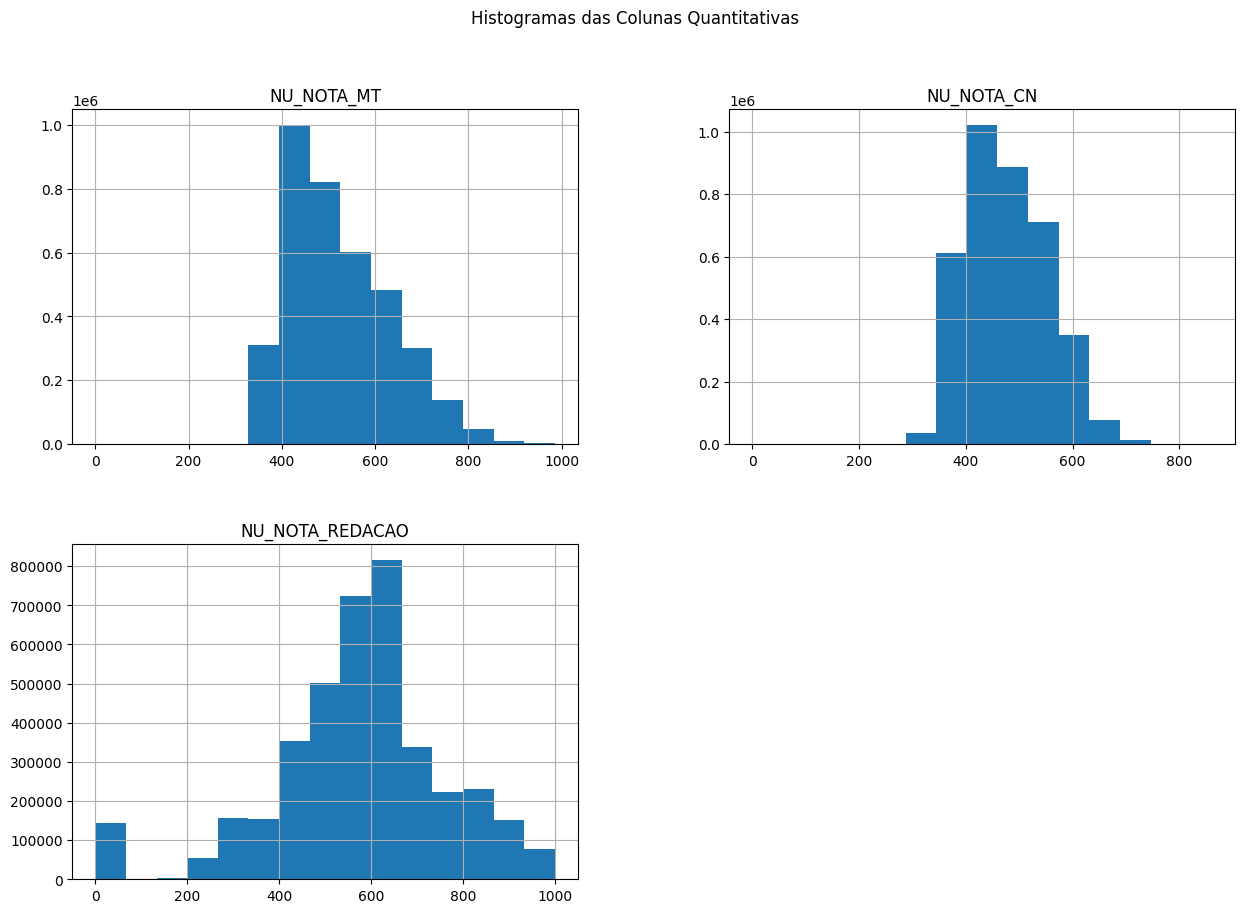

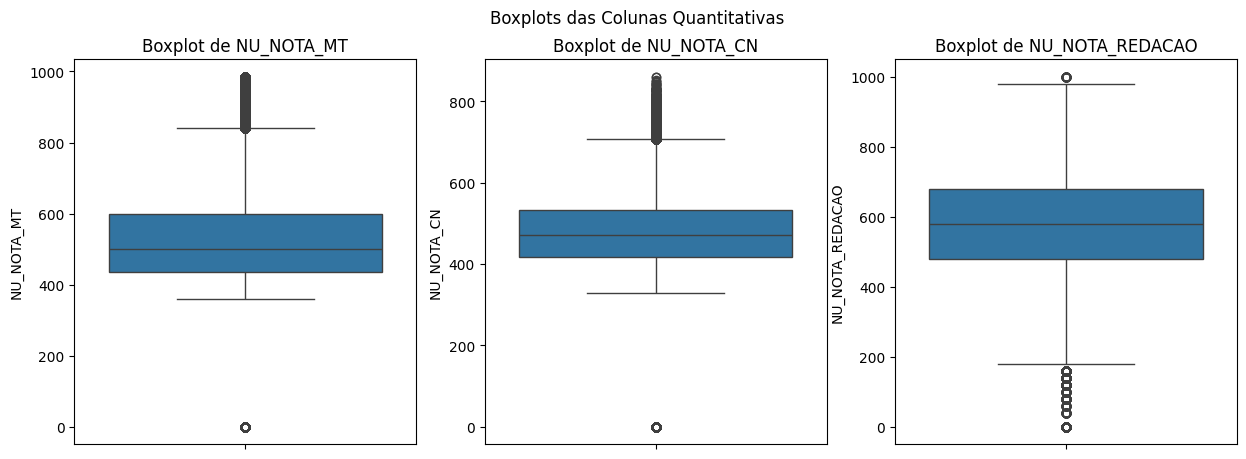

In [65]:
descricao_quantitativa = df[['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']].describe()
print(descricao_quantitativa)

# Histogramas para colunas quantitativas
df[['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histogramas das Colunas Quantitativas')
plt.show()

# Boxplots para colunas quantitativas
plt.figure(figsize=(15, 5))
for i, col in enumerate(['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_REDACAO'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
plt.suptitle('Boxplots das Colunas Quantitativas')
plt.show()

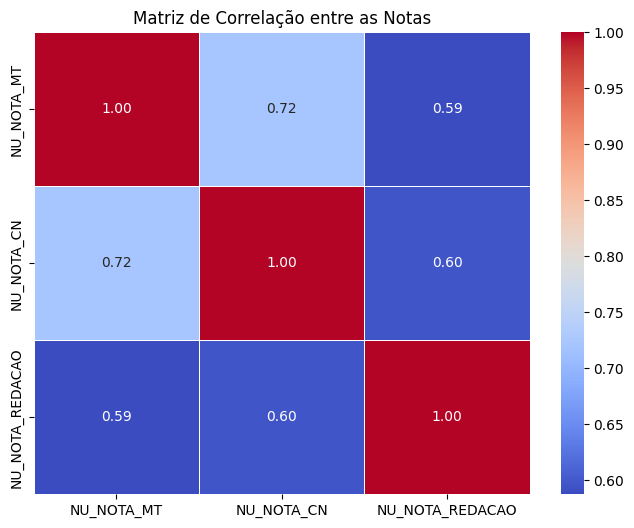

In [74]:
# Criando o heatmap da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Exibindo o título e o gráfico
plt.title('Matriz de Correlação entre as Notas')
plt.show()